In [2]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU, Module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784') # 손글씨 숫자 이미지

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist['data'].shape

(70000, 784)

In [8]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
28*28 # 28*28 이미지를 일렬로 만든값

784

In [10]:
mnist['data'].values[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [17]:
x_data = (mnist['data']/255).values ## 정규화 흑백 색상이므로 255로 나누면 0~1사이 값이 됨 --> numpy()
y_data = pd.get_dummies(mnist['target']).values # 0~9를 one-hot encoding

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.3, stratify=y_data)

In [20]:
x_train[0].shape

(784,)

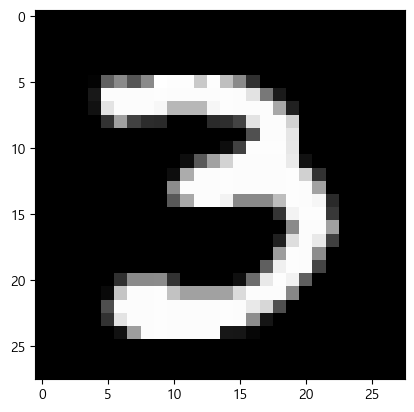

In [22]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()

In [23]:
x = torch.FloatTensor(x_train)
y = torch.FloatTensor(y_train)

In [27]:
feature_len = x.shape[1]
label_len = y.shape[1]

In [38]:
model = Sequential()
model.add_module('nn1', Linear(feature_len, 32)) # w:[8,1] b:[1]
model.add_module('sig1', ReLU()) # 활성함수
model.add_module('nn2', Linear(32,label_len)) # w:[8,1] b:[1]
model.add_module('sig2', Softmax(dim=1)) # 활성함수

loss_fn = torch.nn.CrossEntropyLoss()

In [39]:
optimizer = Adam(model.parameters(), lr=0.01)
hist=[]
for epoch in range(100):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Sigmoid(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print('----------------------------')
    rdata = y.argmax(dim=1).numpy()
    pred = hx.argmax(dim=1).numpy()
    print('정확도', accuracy_score(rdata, pred))    
    print(epoch, cost.item())
    hist.append(cost.item())

----------------------------
정확도 0.11638095238095238
0 2.3027164936065674
----------------------------
정확도 0.24095238095238095
1 2.267085552215576
----------------------------
정확도 0.28585714285714287
2 2.2111387252807617
----------------------------
정확도 0.3564761904761905
3 2.1559276580810547
----------------------------
정확도 0.49942857142857144
4 2.0925283432006836
----------------------------
정확도 0.6608571428571428
5 2.0237722396850586
----------------------------
정확도 0.7198571428571429
6 1.9568852186203003
----------------------------
정확도 0.7421428571428571
7 1.8948169946670532
----------------------------
정확도 0.7548571428571429
8 1.8422985076904297
----------------------------
정확도 0.7628571428571429
9 1.7990800142288208
----------------------------
정확도 0.7706190476190476
10 1.7660681009292603
----------------------------
정확도 0.7807142857142857
11 1.7403285503387451
----------------------------
정확도 0.7986190476190477
12 1.7154943943023682
----------------------------
정확도 0.8129523809

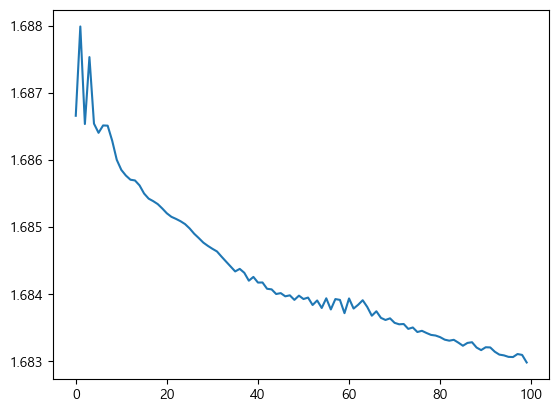

In [36]:
plt.plot(hist)
plt.show()

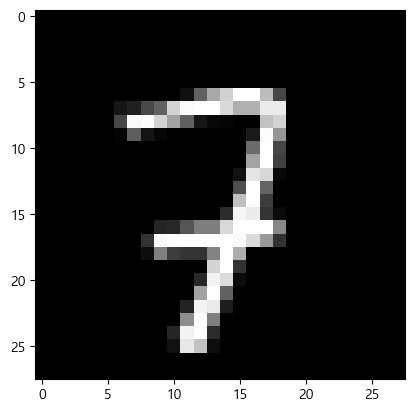

In [40]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

In [43]:
model(torch.FloatTensor(x_test[0].reshape(1,784))).argmax(dim=1)

tensor([7])

In [54]:
pred_train = model(torch.FloatTensor(x_test)).argmax(dim=1).numpy()
pred_train

array([7, 9, 9, ..., 0, 1, 1], dtype=int64)

In [56]:
label_train = y.argmax(dim=1).numpy()

In [57]:
f1_score(label_train, pred_train)

ValueError: Found input variables with inconsistent numbers of samples: [21000, 49000]